In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [ ]:
market_price = pd.read_csv('market.csv')
standard_price = pd.read_csv('standard.csv')
coc = pd.read_csv('cost-of-cultivation.csv')
standard_price

,standard,price
0,rice,2000
1,jowar,1800
2,bajra,1700
3,maize,1500
4,ragi,1300
5,wheat,1225
6,barley,1030
7,gram,1901
8,tur,2000
9,groundnut,2125


In [ ]:
coc

,crop,cost
0,rice,22810
1,jowar,8000
2,bajra,8000
3,maize,16000
4,ragi,10000
5,wheat,17714
6,barley,12000
7,gram,16610
8,tur,16610
9,groundnut,22507


In [ ]:
market_price

,state,commodity,modal_price
0,Andhra Pradesh,Groundnut,4000.0
1,Andhra Pradesh,Tamarind Fruit,5800.0
2,Andhra Pradesh,Tamarind Seed,1800.0
3,Andhra Pradesh,Gur(Jaggery),3000.0
4,Andhra Pradesh,Gur(Jaggery),2500.0
...,...,...,...
8643,West Bengal,Jute,4100.0
8644,West Bengal,Potato,800.0
8645,West Bengal,Rice,3350.0
8646,West Bengal,Jute,4000.0


In [ ]:
#list of considered crops
products=list(coc['crop'])  # ["groundnut", "paddy", "rice", "wheat", "barley", "jowar", "bajra", "maize", "ragi"]
market_edited=market_price[market_price['commodity'].isin([x.capitalize() for x in products ])]
market_edited

,state,commodity,modal_price
0,Andhra Pradesh,Groundnut,4000.0
23,Andhra Pradesh,Groundnut,3500.0
29,Andhra Pradesh,Groundnut,4000.0
44,Andhra Pradesh,Cotton,4600.0
45,Andhra Pradesh,Cotton,4800.0
...,...,...,...
8642,West Bengal,Rice,2620.0
8643,West Bengal,Jute,4100.0
8645,West Bengal,Rice,3350.0
8646,West Bengal,Jute,4000.0


In [ ]:
#take mean of all varieties of one crop
grouped_market = market_edited.groupby(['state', 'commodity']).agg(['mean']).reset_index()
grouped_market.columns = ["".join(x) for x in grouped_market.columns]
grouped_market

,state,commodity,modal_pricemean
0,Andhra Pradesh,Cotton,4633.333333
1,Andhra Pradesh,Groundnut,3833.333333
2,Andhra Pradesh,Maize,1423.000000
3,Andhra Pradesh,Rice,2966.666667
4,Andhra Pradesh,Sunflower,4000.000000
...,...,...,...
64,Uttar Pradesh,Wheat,1597.801418
65,West Bengal,Jute,3589.285714
66,West Bengal,Mustard,3634.090909
67,West Bengal,Rice,2910.666667


In [ ]:
#convert price in quintal to price in kg
grouped_market['modal_pricemean'] = grouped_market['modal_pricemean'].apply(lambda x: float(x)/100)
standard_price['price'] = standard_price['price'].apply(lambda x: float(x)/100)
grouped_market

,state,commodity,modal_pricemean
0,Andhra Pradesh,Cotton,0.004633
1,Andhra Pradesh,Groundnut,0.003833
2,Andhra Pradesh,Maize,0.001423
3,Andhra Pradesh,Rice,0.002967
4,Andhra Pradesh,Sunflower,0.004000
...,...,...,...
64,Uttar Pradesh,Wheat,0.001598
65,West Bengal,Jute,0.003589
66,West Bengal,Mustard,0.003634
67,West Bengal,Rice,0.002911


In [ ]:
standard_price

,standard,price
0,rice,0.002000
1,jowar,0.001800
2,bajra,0.001700
3,maize,0.001500
4,ragi,0.001300
5,wheat,0.001225
6,barley,0.001030
7,gram,0.001901
8,tur,0.002000
9,groundnut,0.002125


In [ ]:
#convert to dictionary of crop to profit or cost
std_prices = dict(zip(standard_price.standard, standard_price.price))
coc_dict = dict(zip(coc.crop, coc.cost))
std_prices

{'bajra': 0.0017000000000000001,
 'barley': 0.00103,
 'cotton': 0.002525,
 'gram': 0.0019010000000000001,
 'groundnut': 0.002125,
 'jowar': 0.0018,
 'jute': 0.001,
 'maize': 0.0015,
 'mesta': 0.0015,
 'mustard': 0.0021,
 'ragi': 0.0013,
 'rice': 0.002,
 'soyabean': 0.001974,
 'sugarcane': 0.0012,
 'sunflower': 0.0015,
 'tur': 0.002,
 'wheat': 0.001225}

In [ ]:
coc_dict

{'bajra': 8000,
 'barley': 12000,
 'cotton': 28286,
 'gram': 16610,
 'groundnut': 22507,
 'jowar': 8000,
 'jute': 21900,
 'maize': 16000,
 'mesta': 21000,
 'mustard': 12260,
 'ragi': 10000,
 'rice': 22810,
 'soyabean': 21000,
 'sugarcane': 24538,
 'sunflower': 21000,
 'tur': 16610,
 'wheat': 17714}

In [ ]:
#state vs crop matrix
yield_mat = pd.read_csv('state-crop-yield.csv')
yield_mat

,state,Rice,Jowar,Bajra,Maize,Ragi,Wheat,Barley,Gram,Tur,Groundnut,Mustard,Soyabean,Sunflower,Cotton,Jute,Mesta,Sugarcane
0,Andhra Pradesh,2921.185587,1054.114954,906.734010,3328.871137,1202.798161,792.552509,0.000000,1139.872298,441.485179,852.638321,356.250000,1450.463670,768.492962,337.124200,0.000000,1507.328725,76472.374723
1,Arunachal Pradesh,1190.479328,0.000000,0.000000,1365.528823,0.000000,1641.024943,0.000000,0.000000,1000.000000,0.000000,963.015008,1258.427658,0.000000,0.000000,0.000000,0.000000,19073.639456
2,Assam,1449.000000,0.000000,0.000000,710.000000,0.000000,1150.000000,0.000000,519.000000,707.000000,0.000000,508.000000,0.000000,0.000000,106.000000,1736.000000,909.000000,37945.000000
3,Bihar,1300.150989,929.180615,933.165970,2281.541439,794.861011,1876.420716,1124.001590,938.555833,1183.194370,652.777778,853.554723,0.000000,1365.017891,0.000000,1474.781553,1344.149973,43134.936405
4,Chattisgarh,1177.000000,843.000000,0.000000,1567.000000,263.000000,996.000000,888.000000,728.000000,471.000000,1122.000000,369.000000,857.000000,459.000000,136.000000,0.000000,361.000000,2550.000000
5,Goa,2652.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52162.000000
6,Gujarat,1610.000000,901.000000,1152.000000,1300.000000,868.000000,2451.000000,0.000000,739.000000,796.000000,1161.000000,1341.000000,716.000000,0.000000,373.000000,0.000000,0.000000,74050.000000
7,Haryana,2894.000000,296.000000,1313.000000,2228.000000,0.000000,3979.000000,2735.000000,725.000000,988.000000,809.000000,1304.000000,0.000000,1598.000000,452.000000,0.000000,0.000000,59987.000000
8,Himachal Pradesh,1447.000000,0.000000,0.000000,2251.000000,1104.000000,1482.000000,1207.000000,901.000000,0.000000,0.000000,495.000000,1342.000000,0.000000,0.000000,0.000000,0.000000,18013.000000
9,Jammu & Kashmir,1960.000000,589.000000,571.000000,1535.000000,0.000000,1543.000000,631.000000,0.000000,0.000000,0.000000,635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
states = yield_mat['state']; crops = list(yield_mat.columns)[1:]; yield_np_mat = np.matrix(yield_mat)  #state and crop lists
prediction_table = {'State':[], 'Crop':[], 'Profit':[]}
yield_np_mat.shape
for i in range(0,yield_np_mat.shape[0]-1):
    for j in range(1,yield_np_mat.shape[1]):
        if (yield_np_mat[i,j]!=0.0):
	    #if yielding in current state then calculate profit
            rs_per_kg = grouped_market[(grouped_market['state']==states[i]) & (grouped_market['commodity'] == crops[j-1])]['modal_pricemean']
            if (rs_per_kg.shape[0]==1):
		#use market price data
                diff = ((yield_np_mat[i,j]) * rs_per_kg.values[0]) - coc_dict[str(crops[j-1].lower())]; val = diff if diff>0.0 else 1.0
            else:
		#use approximated standard price
                diff = ((yield_np_mat[i,j]) * std_prices[str(crops[j-1].lower())]) - coc_dict[str(crops[j-1].lower())]; val = diff if diff>0.0 else 1.0
	    #append all results to a table
            prediction_table['State'].append(states[i]); prediction_table['Crop'].append(crops[j-1]); prediction_table['Profit'].append(val)
        else:
	    #states which cant produce the given crop
            #print("**", states[i],crops[j-1])
            prediction_table['State'].append(states[i]); prediction_table['Crop'].append(crops[j-1]); prediction_table['Profit'].append(-1)
data=pd.DataFrame(prediction_table); data

,State,Crop,Profit
0,Andhra Pradesh,Rice,6.385184e+04
1,Andhra Pradesh,Jowar,1.097407e+04
2,Andhra Pradesh,Bajra,7.414478e+03
3,Andhra Pradesh,Maize,3.136984e+04
4,Andhra Pradesh,Ragi,5.636376e+03
...,...,...,...
590,Puducherry,Sunflower,-1.000000e+00
591,Puducherry,Cotton,7.693075e+04
592,Puducherry,Jute,-1.000000e+00
593,Puducherry,Mesta,-1.000000e+00


Enter State Name:-Madhya Pradesh


,profit
count,8.000000
mean,62969.632780
std,153533.731700
min,121.791667
25%,6656.179808
50%,9933.746667
75%,14527.651042
max,442646.000000


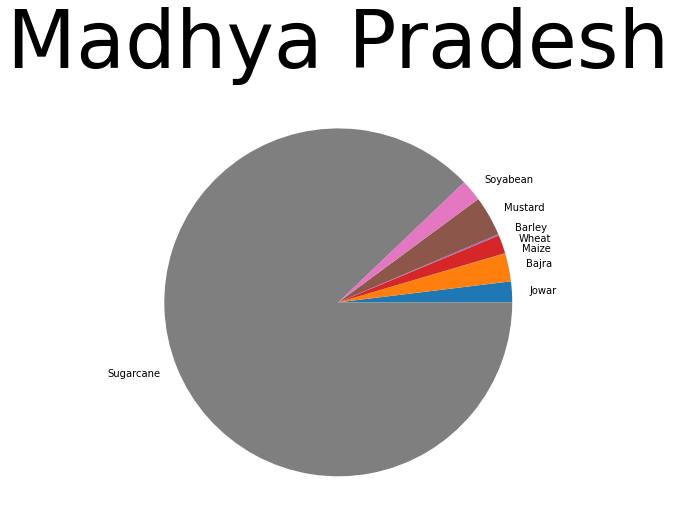

In [ ]:

plt.figure(figsize=((10,8)))
data1={ 'crop':[],
       'profit':[]
}
data2={ 'crop':[],
       'profit':[]
}
data3={ 'crop':[],
       'profit':[]
}
statess=input('Enter State Name:-')
 
for s in range (len(prediction_table['State'])):
    if(prediction_table['State'][s]==statess):
 
        if(prediction_table['Profit'][s]>1):
          data1['crop'].append(prediction_table['Crop'][s])
          data1['profit'].append(prediction_table['Profit'][s]) 
 
        elif(prediction_table['Profit'][s]==-1):
          data2['crop'].append(prediction_table['Crop'][s])
          data2['profit'].append(prediction_table['Profit'][s])
 
        elif(prediction_table['Profit'][s]==1):
          data3['crop'].append(prediction_table['Crop'][s])
          data3['profit'].append(prediction_table['Profit'][s])
 
plt.title(statess,fontsize=80)
plt.pie(data1['profit'], labels = data1['crop'])
 
data1=pd.DataFrame(data1)
data1
data1[['profit','crop']].describe()

In [ ]:
data2=pd.DataFrame(data2)
#sns.catplot(x='crop',kind = 'count',hue='profit',data=data2)
data2

,crop,profit
0,Jute,-1


In [ ]:
#plt.pie(data3['profit'], labels = data3['crop'])
data3=pd.DataFrame(data3)
data3

,crop,profit
0,Rice,1.0
1,Ragi,1.0
2,Gram,1.0
3,Tur,1.0
4,Groundnut,1.0
5,Sunflower,1.0
6,Cotton,1.0
7,Mesta,1.0
